In [2]:
import pandas as pd
import requests
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Data

In [3]:
# This the link to download the dataset used in this notebook
# https://www.kaggle.com/datasets/rohitgrewal/hr-data-mnc
# You can replace the data path to your relative path of the dataset to run the script

data = "C:\\Users\\HP\\Desktop\\Dataset\\HR\\HR_Data_MNC_Data Science Lovers.csv"
df = pd.read_csv(data)
df.head()

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


# Pre-Processing Data

### Check for Missing Values

In [4]:
main_df = df[["Department","Job_Title","Location","Experience_Years","Work_Mode","Salary_INR" ]]

for all in main_df:
    print(f"NA values in {all}: {main_df[all].isna().sum()}")
    print(f"Zero values in {all}: {main_df[all].isnull().sum()}")

main_df.sort_values(by="Salary_INR",ascending=False, inplace=True)
main_df.groupby(["Department","Job_Title","Salary_INR"],as_index=True)
main_df

NA values in Department: 0
Zero values in Department: 0
NA values in Job_Title: 0
Zero values in Job_Title: 0
NA values in Location: 0
Zero values in Location: 0
NA values in Experience_Years: 0
Zero values in Experience_Years: 0
NA values in Work_Mode: 0
Zero values in Work_Mode: 0
NA values in Salary_INR: 0
Zero values in Salary_INR: 0


C:\Users\HP\AppData\Local\Temp\ipykernel_2636\4158951352.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df.sort_values(by="Salary_INR",ascending=False, inplace=True)


,Department,Job_Title,Location,Experience_Years,Work_Mode,Salary_INR
1697605,IT,IT Manager,"Adamsborough, Greenland",7,Remote,2999976
1284141,IT,IT Manager,"Lake Brianna, Greece",14,Remote,2999973
1912378,IT,IT Manager,"Lake Jesusview, Chile",7,On-site,2999944
1904593,IT,IT Manager,"North Michaelchester, Latvia",7,Remote,2999906
645146,IT,IT Manager,"Greenfort, Liechtenstein",8,Remote,2999889
...,...,...,...,...,...,...
263572,HR,HR Executive,"Lake James, Cape Verde",3,On-site,300026
1740641,HR,HR Executive,"Brianshire, Moldova",0,Remote,300020
1535320,HR,HR Executive,"Pooleville, United States Virgin Islands",8,Remote,300018
1526011,HR,HR Executive,"Lake Amandafurt, Turks and Caicos Islands",5,Remote,300015


### Check all different Job Titles and Departments

In [5]:
departments = main_df["Department"].unique().tolist()
job_titles = main_df["Job_Title"].unique().tolist()
each_job_title_count = main_df["Job_Title"].value_counts().to_dict()
each_job_title_count

{'Software Engineer': 300358,
 'Sales Executive': 199982,
 'Operations Executive': 150058,
 'Data Analyst': 120375,
 'Marketing Executive': 120154,
 'Account Manager': 119929,
 'Accountant': 100307,
 'DevOps Engineer': 90197,
 'Logistics Coordinator': 90188,
 'HR Executive': 79348,
 'SEO Specialist': 71692,
 'Business Development Manager': 60233,
 'IT Manager': 60224,
 'Financial Analyst': 59815,
 'Research Scientist': 50017,
 'Talent Acquisition Specialist': 47994,
 'Supply Chain Manager': 44935,
 'Content Strategist': 36154,
 'CTO': 29888,
 'Product Developer': 29872,
 'Finance Manager': 29799,
 'HR Manager': 23841,
 'Sales Director': 19887,
 'Operations Director': 14914,
 'Lab Technician': 14829,
 'Brand Manager': 12081,
 'CFO': 9952,
 'HR Director': 7936,
 'Innovation Manager': 5041}

# Visualisation

### Salary of each Job Title in all Departments

Text(0.5, 1.0, 'Salary of each Job Title in all Departments\n')

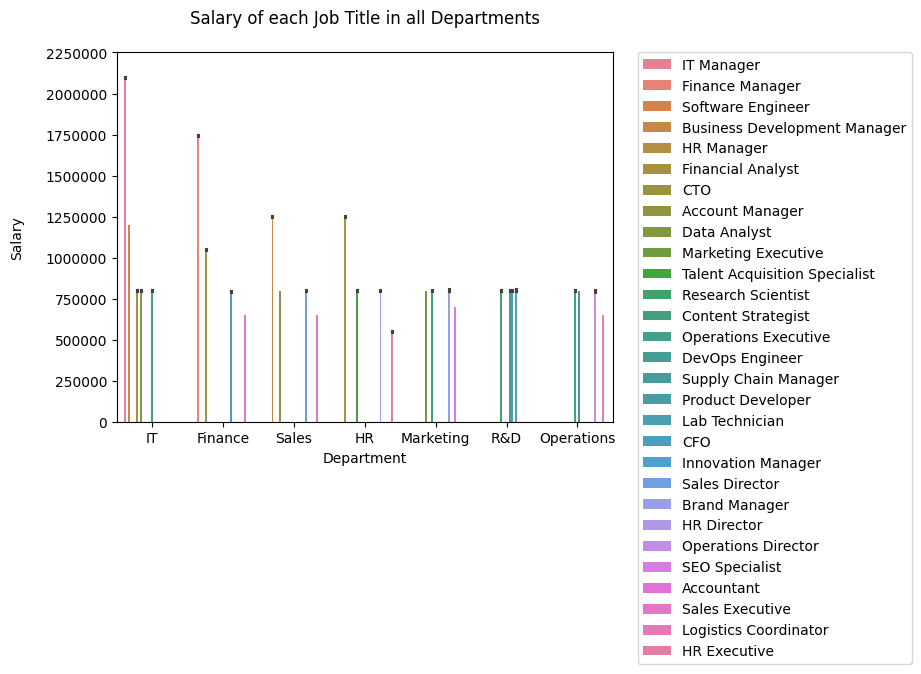

In [6]:
plot = sns.barplot(data = main_df, x = "Department", y = "Salary_INR", hue = "Job_Title")
plot.legend(bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.,)
plot.set_yticks(range(0,2300000, 250000))
plot.ticklabel_format(style='plain', axis='y')
plot.set_ylabel("Salary\n")
plot.set_title("Salary of each Job Title in all Departments\n")



### Salary of each Job Title based on Experience in Year

Text(0.5, 1.0, 'Salary of each Job Title based on Experience in Years\n')

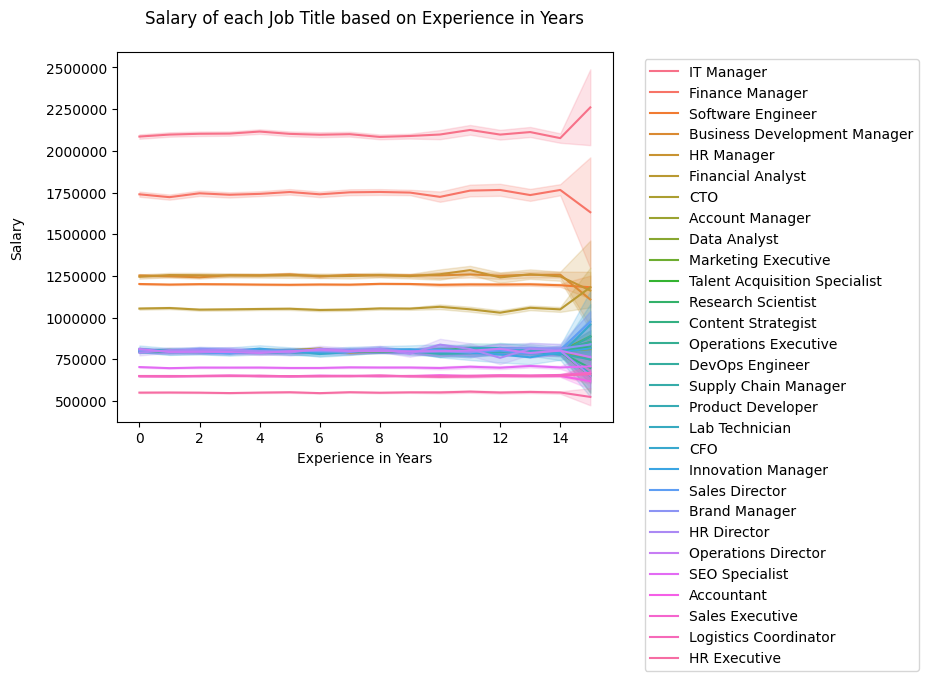

In [7]:
plot = sns.lineplot(data=main_df, x="Experience_Years", y="Salary_INR", hue="Job_Title", markers="o")
plot.ticklabel_format(style='plain', axis='y')
plot.set_ylabel("Salary\n")
plot.set_xlabel("Experience in Years")
plot.legend(bbox_to_anchor=(1.05, 1))
plot.set_title("Salary of each Job Title based on Experience in Years\n")

### Number of Employees based on Work Mode

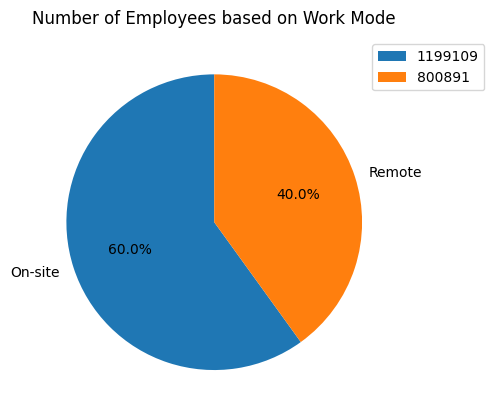

In [8]:
da= main_df.groupby("Work_Mode")["Work_Mode"].value_counts()
labels=main_df.groupby("Work_Mode")["Salary_INR"].unique().to_dict()
fig, ax = plt.subplots()
wedges, texts, autotexts =ax.pie(da, labels=labels,
                                 startangle=90, 
                                 labeldistance=1.1, 
                                 autopct="%1.1f%%",)

plt.title("Number of Employees based on Work Mode", pad=10)
plt.legend(da ,bbox_to_anchor=(1.25, 1))

C:\Users\HP\AppData\Local\Temp\ipykernel_2636\1714710512.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels=main_df.groupby("Department")["Department"].unique().to_dict())


(-0.5, 8.0)

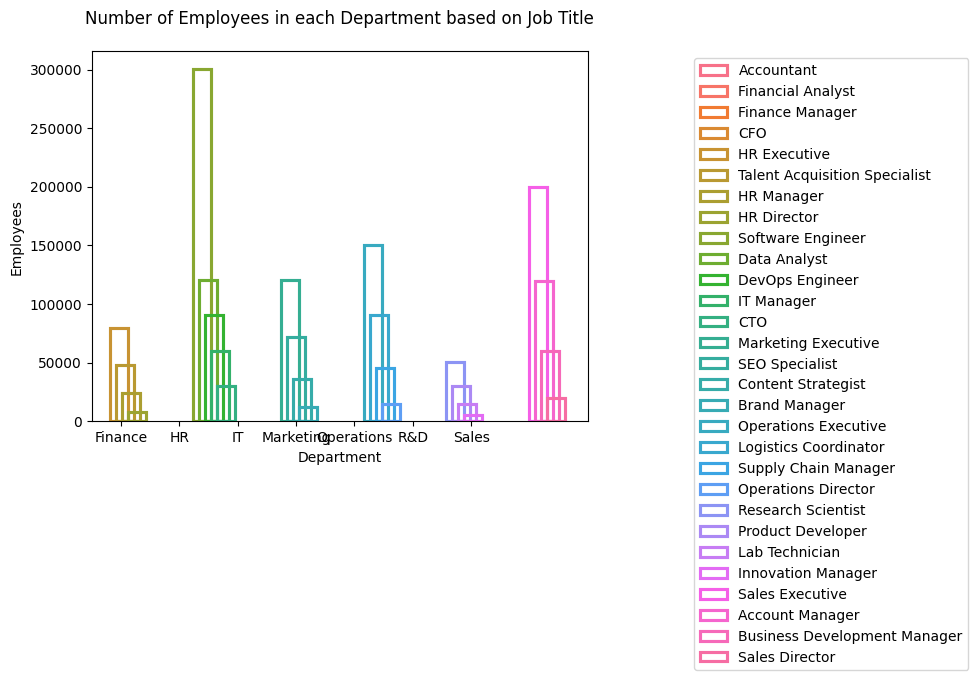

In [ ]:
d=main_df.groupby("Department")["Job_Title"].value_counts().to_frame()

plot=sns.barplot(data=d,
            x="Department",
            y="count",
           hue="Job_Title",
           gap=4,
           saturation=2,
           width=3,
           fill=False,
           weights="count")
plot.legend(bbox_to_anchor=(1.2, 1))
plot.set_title("Number of Employees in each Department based on Job Title", pad=20)
plot.set_ylabel("Employees")
plot.set_xticklabels(labels=main_df.groupby("Department")["Department"].unique().to_dict())
plot.set_xlim(right=8)
#d.head()


### Distribution of Average Salary based on Job Title

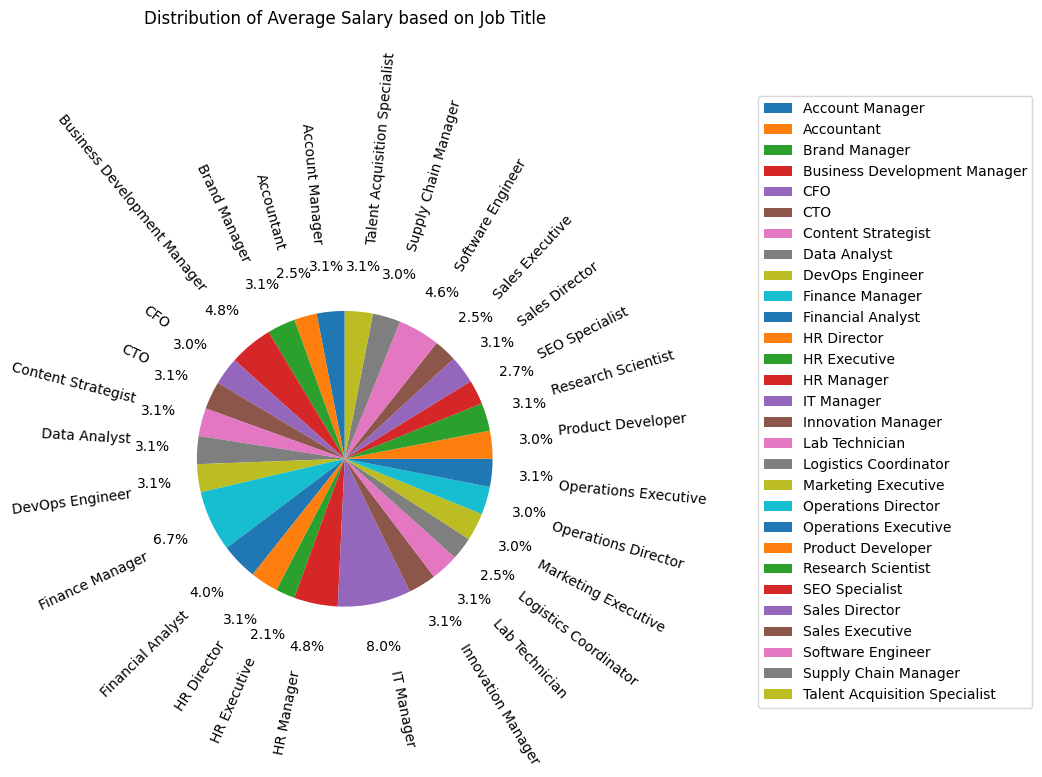

In [ ]:
da= main_df.groupby("Job_Title")["Salary_INR"].mean()
da.sort_values(ascending=True) #inplace=True
labels=main_df.groupby("Job_Title")["Job_Title"].unique().to_dict()
value=np.array(da.to_list())
da2=main_df[["Job_Title", "Salary_INR"]].sort_values(by="Salary_INR", ascending=True)
fig, ax = plt.subplots()
wedges, texts, autotexts =ax.pie(da, labels=labels,
                                 startangle=90, 
                                 labeldistance=1.45, 
                                 autopct="%1.1f%%" , 
                                 pctdistance=1.3, 
                                 rotatelabels=True)

plt.title("Distribution of Average Salary based on Job Title", pad=180)
plt.legend(labels ,bbox_to_anchor=(1.6, 1.5))

# Author
### Tlale Prince Lethoko